# Prodotto Interno Lordo namq_10_gdp

# PIL

Eurostat pubblica oltre 9.300 dataset di informazioni sui 27 paesi UE  
Ogni dataset a sua volta è un contenitore di ulteriori informazioni  
Vediamo ad esempio il **PIL** (GDP in inglese): uno dei dataset è il **namq_10_gdp**

Il formato standard (e difficile) per la gestione dei dati statistici è lo SDMX; un suo surrogato più semplice è il JSON  
Per "smontarlo" e renderlo una tabella (CSV, TSV, xls) occorre fare una serie di passaggi (parsing, fetching) che appesantiscono il risultato finale  
Estrarre "tutto" il dataset da Eurostat è inutile e pesante: nel caso di namq_10_gdp si tratta di oltre 3 milioni di informazioni per tutti i 27 paesi  
Eurostat mette a disposizione una API che restituisce subset in base alla domanda (GET) che le viene fatta  
In questo modo si può chiedere solo i dati relativi a P7 di IT e DE  
L'unica dimensione che non si può filtrare a monte è time  
## Dimensioni di namq_10_gdp

- **freq** Q: Quarterly
- **unit** CLV10_MEUR: Chain linked volumes (2010), million euro
- **s_adj** Seasonally and calendar adjusted data
- **geo** (41 items): 
	- 'European Union - 27 countries (from 2020)', 
	- 'Euro area (EA11-1999, EA12-2001, EA13-2007, EA15-2008, EA16-2009, EA17-2011, EA18-2014, EA19-2015, EA20-2023)', 
	- 'Euro area – 20 countries (from 2023)', 
	- 'Euro area - 19 countries (2015-2022)', 
	- 'Euro area - 12 countries (2001-2006)', 
	- 'Belgium', 
	- 'Bulgaria',
	- 'Czechia', 
	- 'Denmark',
	- 'Germany',
	- 'Estonia',
	- 'Ireland', 
	- 'Greece', 
	- 'Spain',
	- 'France', 
	- 'Croatia',
	- '**Italy**', 
	- 'Cyprus',
	- 'Latvia',
	- 'Lithuania', 
	- 'Luxembourg', 
	- 'Hungary',
	- 'Malta',
	- 'Netherlands',
	- 'Austria', 
	- 'Poland',
	- 'Portugal',
	- 'Romania', 
	- 'Slovenia',
	- 'Slovakia', 
	- 'Finland', 
	- 'Sweden', 
	- 'Iceland', 
	- 'Norway', 
	- 'Switzerland', 
	- 'United Kingdom', 
	- 'Montenegro', 
	- 'North Macedonia',
	- 'Albania', 
	- 'Serbia', '
	- Türkiye'
- **na_items** (39 items):
	- B11: External balance of goods and services
	- B111: External balance - goods
	- B112: External balance - services
	- **B1G: Value added, gross**
	- B1GQ: Gross domestic product at market prices
	- B2A3G: Operating surplus and mixed income, gross
	- D1: Compensation of employees
	- D11: Wages and salaries
	- D12: Employers' social contributions
	- D2: Taxes on production and imports
	- D21: Taxes on products
	- D21X31: Taxes less subsidies on products
	- D2X3: Taxes on production and imports less subsidies
	- D3: Subsidies
	- D31: Subsidies on products
	- P3: Final consumption expenditure
	- P31_S13: Individual consumption expenditure of general government
	- P31_S14: Final consumption expenditure of households
	- P31_S14_S15: Household and NPISH final consumption expenditure
	- P31_S15: Final consumption expenditure of NPISH
	- P32_S13: Collective consumption expenditure of general government
	- P3_P5: Final consumption expenditure and gross capital formation
	- P3_P6: Final consumption expenditure, gross capital formation and exports of goods and services
	- P3_S13: Final consumption expenditure of general government
	- P41: Actual individual consumption
	- P51G: Gross fixed capital formation
	- P52: Changes in inventories
	- P52_P53: Changes in inventories and acquisitions less disposals of valuables
	- P53: Acquisitions less disposals of valuables
	- P5G: Gross capital formation
	- P6: Exports of goods and services
	- P61: Exports of goods
	- P62: Exports of services
	- P7: Imports of goods and services
	- P71: Imports of goods
	- P72: Imports of services
	- YA0: Statistical discrepancy (expenditure approach)
	- YA1: Statistical discrepancy (production approach)
	- YA2: Statistical discrepancy (income approach)




Alcune **aggregazioni territoriali Eurostat** sono molto comuni nei dataset economici:

|Codice geo|Nome esteso|Descrizione sintetica|
|---|---|---|
|**EU27_2020**|European Union – 27 countries (from 2020)|UE a 27 dopo Brexit|
|**EA11**|Euro area (EA11-1999)|Eurozona originaria al 1999|
|**EA12**|Euro area – 12 countries (2001)|Include Grecia|
|**EA13–EA20**|Euro area espansa|Include i paesi entrati fino a EA20 (2023)|
|**EA19**|Euro area – 19 countries (2015–2022)|Usata prima dell'ingresso della Croazia|
|**EA20**|Euro area – 20 countries (from 2023)|Include Croazia|

- Se il grafico parte dal 1995, usare **EA11**, **EA12** o **EA19** per **consistenza storica**
- Se interessa **l’attuale configurazione**,  **EA20** o **EU27_2020**
- Può avere senso affiancare:
    - `Germany`, `France`, `Italy`, `Spain`   
    - `EA20`, `EU27_2020`
    

`na_item` contiene **39 voci**, ciascuna rappresentante un **aggregato contabile nazionale** secondo il sistema ESA 2010 (European System of Accounts):

Tra queste, la voce più comunemente usata per rappresentare il **PIL** è: `B1GQ` – _Gross Domestic Product at market prices_  
B1GQ è il PIL nella sua definizione ufficiale secondo l'ESA 2010  
È il risultato dell'identità contabile:
    
    ```
    PIL = Consumi finali + Investimenti + (Esportazioni - Importazioni)
        = Valore aggiunto lordo + Imposte sui prodotti - Sussidi sui prodotti
    ```
    
È la voce sintetica più rappresentativa per confronti internazionali e temporali.

Le voci `na_item` più comunemente utilizzate nei grafici e nelle analisi macroeconomiche (oltre a `B1GQ`) sono quelle che compongono o spiegano le principali **identità contabili** della contabilità nazionale: **produzione, reddito, spesa**. 
Ecco una selezione delle più rilevanti e frequentemente utilizzate:

### **Contabilità della produzione**

|Codice|Descrizione|Uso comune|
|---|---|---|
|`B1GQ`|Gross domestic product at market prices (PIL)|Principale misura dell’attività economica|
|`B1G`|Value added, gross|Valore aggiunto lordo (PIL a prezzi base)|
|`D2`|Taxes on production and imports|Per ricostruire il passaggio da VA a PIL|
|`D3`|Subsidies|Idem, con segno opposto alle imposte|

### **Contabilità della spesa (domanda aggregata)**

|Codice|Descrizione|Uso comune|
|---|---|---|
|`P3`|Final consumption expenditure|Consumi totali|
|`P31S14`|Final consumption expenditure of households|Consumi privati|
|`P31S13`|Final consumption expenditure of general government|Consumi pubblici|
|`P5G`|Gross capital formation|Investimenti|
|`P6`|Exports of goods and services|Esportazioni|
|`P7`|Imports of goods and services|Importazioni|

### **Contabilità del reddito**

|Codice|Descrizione|Uso comune|
|---|---|---|
|`D1`|Compensation of employees|Occupazione e redditi|
|`D11`|Wages and salaries|Salari|
|`D12`|Employers' social contributions|Contributi sociali|
|`B2A3G`|Gross operating surplus and mixed income|Profitti lordi (imprese e autonomi)|
|`B5G`|Gross national income|Reddito nazionale lordo|
|`B6G`|Gross disposable income|Reddito disponibile lordo|


Se servono per **analisi più dettagliate** del PIL o della contabilità nazionale si possono usare:

|Codice|Descrizione sintetica|Uso tipico|
|---|---|---|
|**B1G**|Valore aggiunto lordo a prezzi base|Analisi produttività|
|**D1**|Retribuzioni dei dipendenti|Mercato del lavoro|
|**P3**|Spesa per consumi finali|Consumi privati e pubblici|
|**P5G**|Formazione lorda di capitale (investimenti)|Cicli economici|
|**P6**|Esportazioni di beni e servizi|Commercio estero|
|**P7**|Importazioni di beni e servizi|Commercio estero|
|**B9**|Saldo economico netto (risparmio nazionale)|Risparmio/investimenti|
|**B2A3G**|Risultato operativo lordo (gross operating surplus)|Profitti imprese|

- **Analisi settoriale o funzionale**: per esempio, confrontare `P3` (consumi) e `P5G` (investimenti).
- **Studio della domanda aggregata**: `P3 + P5G + (P6 - P7)` deve uguagliare `B1GQ`.
- **Analisi del reddito primario**: `D1`, `B2A3G`, ecc.
- **Per derivare il PIL via produzione, spesa o reddito**, si usano combinazioni specifiche di `na_item`.

### In sintesi

|Tipo Analisi|Voci chiave|
|---|---|
|PIL aggregato|`B1GQ`|
|Pil lato offerta|`B1G`, `D2`, `D3`|
|Pil lato spesa|`P3`, `P5G`, `P6`, `P7`|
|Pil lato reddito|`D1`, `B2A3G`, `B5G`, `B6G`|
|Famiglie|`P31S14`, `D11`, `B6G`|
|Governo|`P31S13`, `D12`, `D2`, `D5`|


### Risorse utili

- [Eurostat Metadata - ESA 2010 aggregates](https://ec.europa.eu/eurostat/cache/metadata/en/nama_10_gdp_esms.htm)
- [Manuale ESA 2010](https://ec.europa.eu/eurostat/documents/3859598/5925693/KS-02-13-269-EN.PDF)



### PIL reale trimestrale (valori concatenati al 2010) per Italia, Germania, Francia e Spagna in valori assoluti (milioni di euro).

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from eurostat_utils import fetch_eurostat_data

# Parametri per fatturato estero
params = {
        'geo': ['IT', 'DE', 'FR','ES'],
        'unit': 'CLV10_MEUR',
        's_adj': 'SCA',
        'na_item': ['B1GQ']
}

# Estrai i dati
df = fetch_eurostat_data("namq_10_gdp", params)

In [2]:
df.sample()

,freq_code,freq_label,unit_code,unit_label,s_adj_code,s_adj_label,na_item_code,na_item_label,geo_code,geo_label,time_code,time_label,value,time
330,Q,Quarterly,CLV10_MEUR,"Chain linked volumes (2010), million euro",SCA,Seasonally and calendar adjusted data,B1GQ,Gross domestic product at market prices,FR,France,1998-Q1,1998-Q1,402077.6,1998-01-01


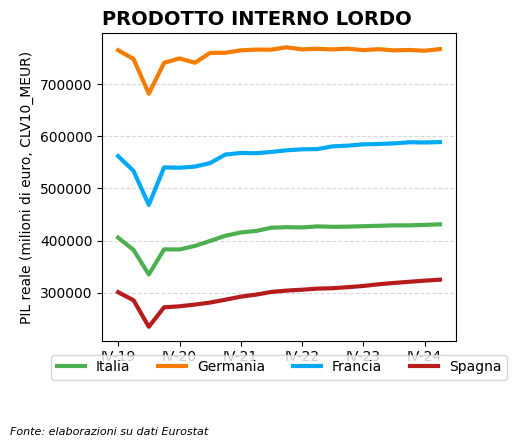

In [3]:
import matplotlib.pyplot as plt

# Mappa colori (stile Prometeia)
colori = {
    'Italia': '#4CAF50',     # verde
    'Germania': '#f57c00',   # arancione
    'Francia': '#03A9F4',    # azzurro
    'Spagna': '#b71c1c'      # rosso scuro
}

# Uniforma le etichette dei paesi
df['geo_label'] = df['geo_label'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'France': 'Francia',
    'Spain': 'Spagna'
})

# Etichette X tipo "I-22", "III-23", ...
def quarter_label(dt):
    qmap = {1: 'I', 4: 'II', 7: 'III', 10: 'IV'}
    return f"{qmap.get(dt.month, '')}-{str(dt.year)[-2:]}" if dt.month in qmap else ''

df['x_label'] = df['time'].apply(quarter_label)

# Filtra periodo recente (es. dal 2019 in poi)
df_plot = df[df['time_label'] >= '2019-Q4']

# Plot
plt.figure(figsize=(5,4))

for country in ['Italia', 'Germania', 'Francia', 'Spagna']:
    if country in df_plot['geo_label'].unique():
        data = df_plot[df_plot['geo_label'] == country].sort_values('time')
        plt.plot(data['time'], data['value'], label=country,
                 color=colori[country], linewidth=3)

# XTICKS: ogni 4 trimestri
xtick_data = (
    df_plot[['time', 'x_label']]
    .drop_duplicates('time')
    .sort_values('time')
    .iloc[::4]
)

plt.xticks(ticks=xtick_data['time'], labels=xtick_data['x_label'], rotation=0)


# Layout
plt.title("PRODOTTO INTERNO LORDO", loc='left', fontsize=14, weight='bold')
plt.ylabel("PIL reale (milioni di euro, CLV10_MEUR)")
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
plt.figtext(0.01, -0.1, "Fonte: elaborazioni su dati Eurostat", fontsize=8, style='italic')

plt.tight_layout()
plt.savefig("PIL_valori_assoluti.png", dpi=300, bbox_inches='tight')  # ⬅️ Salva PNG
plt.show()


## PIL reale indicizzato (base = IV 2019 = 100)

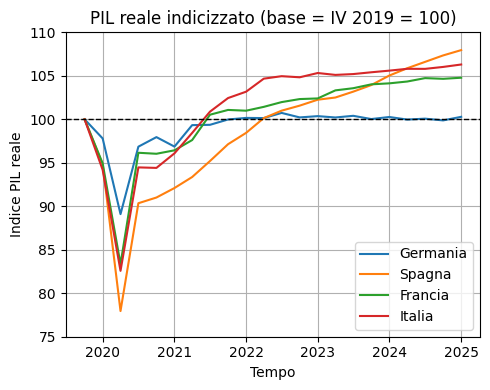

In [6]:
import matplotlib.pyplot as plt

# 1. Definisci periodo base
base_period = '2019-Q4'

# 2. Estrai valore base per ciascun paese
base_values = (
    df[df['time_label'] == base_period]
    .loc[:, ['geo_code', 'value']]
    .rename(columns={'value': 'base_value'})
)

# 3. Merge e calcolo indice base 100
df_base100 = df.merge(base_values, on='geo_code', how='left')
df_base100['base_100'] = 100 * df_base100['value'] / df_base100['base_value']

# 4. Filtra i dati da base_period in poi
df_base100 = df_base100[df_base100['time_label'] >= base_period]

# 5. Grafico quadrato
plt.figure(figsize=(5,4))

for country in df_base100['geo_label'].unique():
    data = df_base100[df_base100['geo_label'] == country].sort_values('time')
    plt.plot(data['time'], data['base_100'], label=country)

plt.axhline(100, color='black', linestyle='--', linewidth=1)  # linea base
plt.ylim(75, 110)
plt.title("PIL reale indicizzato (base = IV 2019 = 100)")
plt.xlabel("Tempo")
plt.ylabel("Indice PIL reale")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


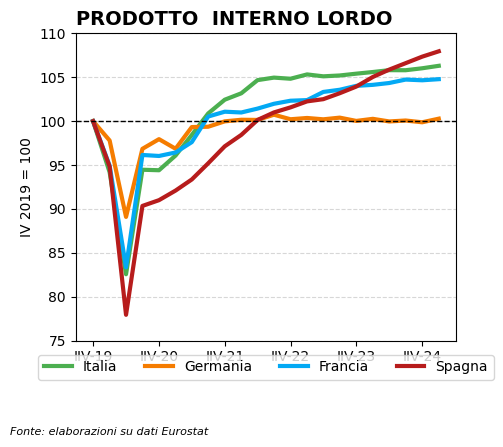

In [7]:
import matplotlib.pyplot as plt

# Mappa colori personalizzati
colori = {
    'Italia': '#4CAF50',     # verde
    'Germania': '#f57c00',   # arancione
    'Francia': '#03A9F4',    # azzurro
    'Spagna': '#b71c1c'      # rosso scuro
}

# Sostituisci geo_label se necessario
df_base100['geo_label'] = df_base100['geo_label'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'France': 'Francia',
    'Spain': 'Spagna'
})

# Etichette trimestrali: 'IV-19', 'I-20', ecc.
def quarter_label(dt):
    q = f"I{'II' if dt.month==4 else 'III' if dt.month==7 else 'IV' if dt.month==10 else 'I'}"
    return f"{q}-{str(dt.year)[-2:]}"

df_base100['x_label'] = df_base100['time'].apply(quarter_label)

# Filtra solo da IV-2019 in poi
df_base100 = df_base100[df_base100['time_label'] >= '2019-Q4']

# Plot
plt.figure(figsize=(5,4))

for country in ['Italia', 'Germania', 'Francia', 'Spagna']:
    if country in df_base100['geo_label'].unique():
        data = df_base100[df_base100['geo_label'] == country].sort_values('time')
        plt.plot(data['time'], data['base_100'],
                 label=country,
                 color=colori[country],
                 linewidth=3)

# Layout grafico
plt.axhline(100, color='black', linestyle='--', linewidth=1)
plt.ylim(75, 110)
plt.title("PRODOTTO  INTERNO LORDO", loc='left', fontsize=14, weight='bold')
plt.ylabel("IV 2019 = 100")
# Genera etichette solo per IV trimestre di ogni anno
xticks = []
xlabels = []
for time, label in zip(data['time'], data['x_label']):
    if 'IV' in label:  # mostra solo IV trimestre
        xticks.append(time)
        xlabels.append(label)

plt.xticks(ticks=xticks, labels=xlabels, rotation=0)

plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)

# Fonte
plt.figtext(0.01, -0.1, "Fonte: elaborazioni su dati Eurostat", fontsize=8, style='italic')

plt.tight_layout()
plt.show()


## PIL
![|300](media/2025-06-16.png)



## **variazione percentuale del PIL reale sul trimestre precedente** (`Δ% trimestrale`)
in stile Prometeia

![PILTrim|300](media/C3CNRY8Z%201.png)


| Elemento       | Dettaglio                                                        |
| -------------- | ---------------------------------------------------------------- |
| 📈 Dato        | Variazione % trimestrale del **PIL reale**                       |
| 🗓️ Periodo    | Dal **2022-Q1** (`I-22`) al **2025-Q1** (`I-25`)                  |
| 🎨 Colori      | Come prima: 🇮🇹 verde, 🇩🇪 arancione, 🇫🇷 azzurro, 🇪🇸 rosso |
| 📐 Forma       | Quadrata                                                         |
| 📊 Asse Y      | Scala da **-0.5% a 2.0%**                                        |
| 📆 Etichette X | `I-22`, `III-22`, `I-23`, `III-23`, … `I-25`                     |
| 🧾 Fonte       | "Fonte: elaborazioni Prometeia su dati Eurostat"                 |


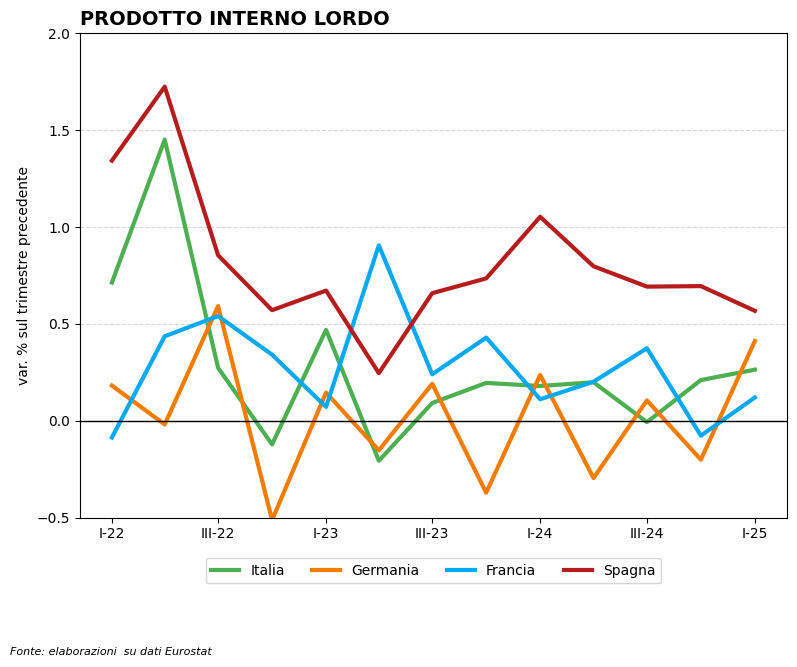

In [8]:
import matplotlib.pyplot as plt

# 1. Calcola variazione % rispetto al trimestre precedente (Δ %)
df_var = df.sort_values(['geo_code', 'time']).copy()
df_var['var_pct'] = df_var.groupby('geo_code')['value'].pct_change() * 100

# 2. Filtra periodo desiderato (es. 2022-Q1 in poi)
df_var = df_var[df_var['time_label'] >= '2022-Q1']

# 3. Etichette asse X come 'I-22', 'III-23', ecc.
def quarter_label(dt):
    qmap = {1: 'I', 4: 'II', 7: 'III', 10: 'IV'}
    return f"{qmap.get(dt.month, '')}-{str(dt.year)[-2:]}" if dt.month in qmap else ''

df_var['x_label'] = df_var['time'].apply(quarter_label)

# 4. Colori Prometeia
colori = {
    'Italia': '#4CAF50',
    'Germania': '#f57c00',
    'Francia': '#03A9F4',
    'Spagna': '#b71c1c'
}

# Etichetta coerente
df_var['geo_label'] = df_var['geo_label'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'France': 'Francia',
    'Spain': 'Spagna'
})

# 5. Genera il grafico
plt.figure(figsize=(8,6))

for country in ['Italia', 'Germania', 'Francia', 'Spagna']:
    if country in df_var['geo_label'].unique():
        data = df_var[df_var['geo_label'] == country]
        plt.plot(data['time'], data['var_pct'], label=country,
                 color=colori[country], linewidth=3)

# Asse Y e X configurati come nel grafico originale
plt.axhline(0, color='black', linestyle='-', linewidth=1)
plt.ylim(-0.5, 2.0)

# Etichette X ogni 2 trimestri
x_ticks = df_var['time'].drop_duplicates().sort_values()[::2]
x_labels = df_var[df_var['time'].isin(x_ticks)].drop_duplicates('time')['x_label']
plt.xticks(ticks=x_ticks, labels=x_labels, rotation=0)

# Titolo, etichette e layout
plt.title("PRODOTTO INTERNO LORDO", loc='left', fontsize=14, weight='bold')
plt.ylabel("var. % sul trimestre precedente")
plt.legend(loc='lower center', ncol=4, bbox_to_anchor=(0.5, -0.15))
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.figtext(0.01, -0.1, "Fonte: elaborazioni  su dati Eurostat", fontsize=8, style='italic')

plt.tight_layout()
# Salva il grafico come immagine PNG (300 DPI, stile Prometeia)
plt.savefig("./media/PIL_var_trimestrale.png", dpi=300, bbox_inches='tight', transparent=False)

plt.show()


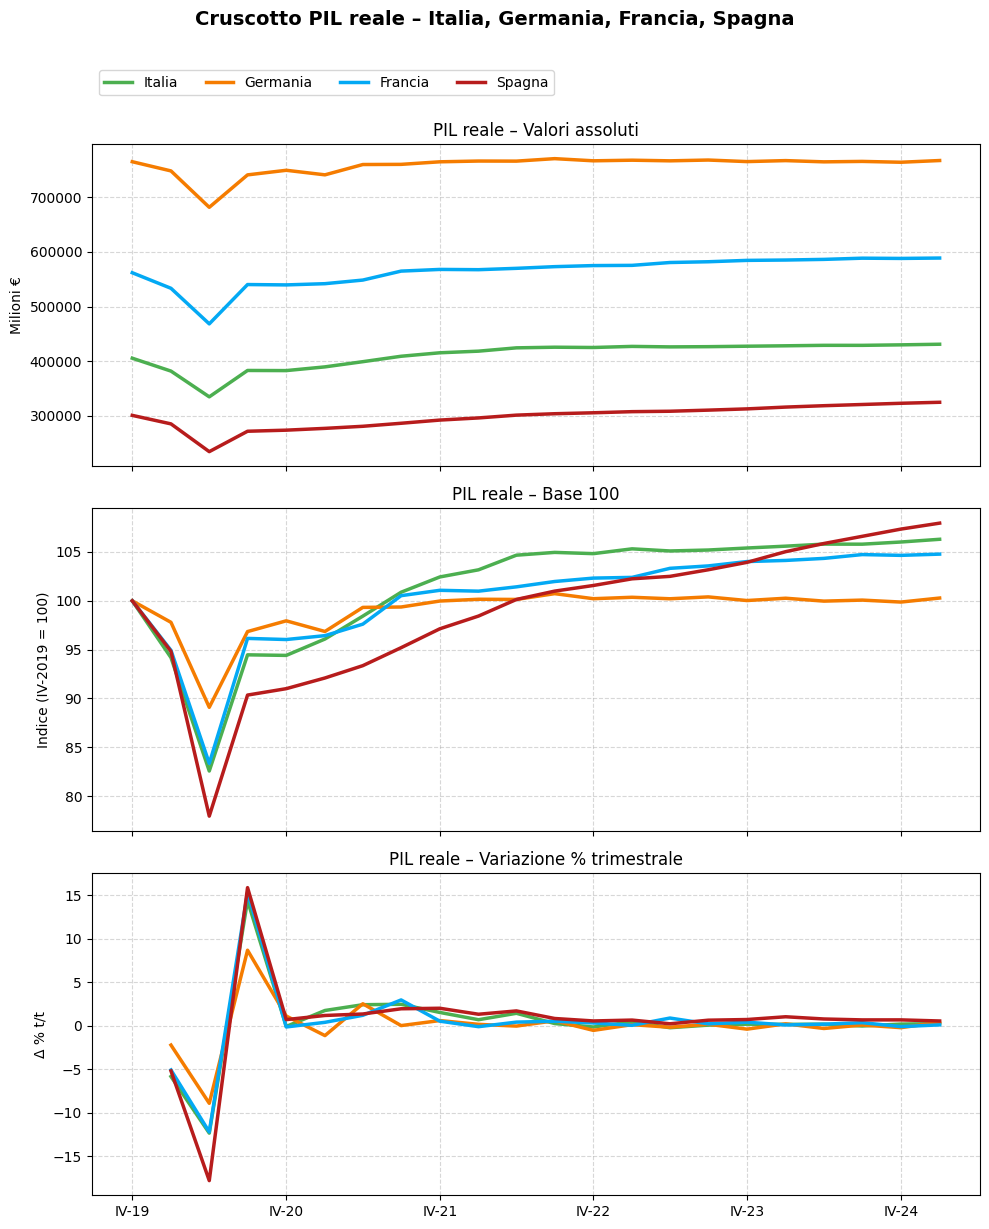

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assumiamo che 'df' contenga le colonne: ['geo_label', 'geo_code', 'time_label', 'time', 'value']
# E che 'time' sia in formato datetime64[ns] e 'time_label' in formato 'YYYY-Qx'

# Filtro e copia
df_plot = df[df['time_label'] >= '2019-Q4'].copy()
df_plot['geo_label'] = df_plot['geo_label'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'France': 'Francia',
    'Spain': 'Spagna'
})

# Etichette X per trimestre
def quarter_label(dt):
    qmap = {1: 'I', 4: 'II', 7: 'III', 10: 'IV'}
    return f"{qmap.get(dt.month, '')}-{str(dt.year)[-2:]}" if dt.month in qmap else ''
df_plot['x_label'] = df_plot['time'].apply(quarter_label)

# Base 100 (IV 2019)
base_period = '2019-Q4'
df_plot['base_100'] = df_plot.groupby('geo_code')['value'].transform(
    lambda x: 100 * x / x[df_plot['time_label'] == base_period].values[0]
)

# Variazione % trimestre su trimestre
df_plot.sort_values(['geo_code', 'time'], inplace=True)
df_plot['delta_pct'] = df_plot.groupby('geo_code')['value'].pct_change() * 100

# Colori
colori = {
    'Italia': '#4CAF50',
    'Germania': '#f57c00',
    'Francia': '#03A9F4',
    'Spagna': '#b71c1c'
}

# Plot
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# A. Valori assoluti
for country in colori:
    data = df_plot[df_plot['geo_label'] == country]
    axs[0].plot(data['time'], data['value'], label=country, color=colori[country], linewidth=2.5)
axs[0].set_ylabel("Milioni €")
axs[0].set_title("PIL reale – Valori assoluti")
axs[0].grid(True, linestyle='--', alpha=0.5)

# B. Base 100
for country in colori:
    data = df_plot[df_plot['geo_label'] == country]
    axs[1].plot(data['time'], data['base_100'], label=country, color=colori[country], linewidth=2.5)
axs[1].set_ylabel("Indice (IV-2019 = 100)")
axs[1].set_title("PIL reale – Base 100")
axs[1].grid(True, linestyle='--', alpha=0.5)

# C. Variazione %
for country in colori:
    data = df_plot[df_plot['geo_label'] == country]
    axs[2].plot(data['time'], data['delta_pct'], label=country, color=colori[country], linewidth=2.5)
axs[2].set_ylabel("Δ % t/t")
axs[2].set_title("PIL reale – Variazione % trimestrale")
axs[2].grid(True, linestyle='--', alpha=0.5)

# Etichette X (una ogni 4 trimestri)
xtick_data = (
    df_plot[['time', 'x_label']]
    .drop_duplicates('time')
    .sort_values('time')
    .iloc[::4]
)
axs[2].set_xticks(xtick_data['time'])
axs[2].set_xticklabels(xtick_data['x_label'], rotation=0)

# Legenda e titolo
axs[0].legend(loc='upper left', ncol=4, bbox_to_anchor=(0, 1.25))
fig.suptitle("Cruscotto PIL reale – Italia, Germania, Francia, Spagna", fontsize=14, weight='bold', y=1.02)
fig.tight_layout()

# Salva PNG
plt.savefig("cruscotto_pil.png", dpi=300, bbox_inches='tight')
plt.show()


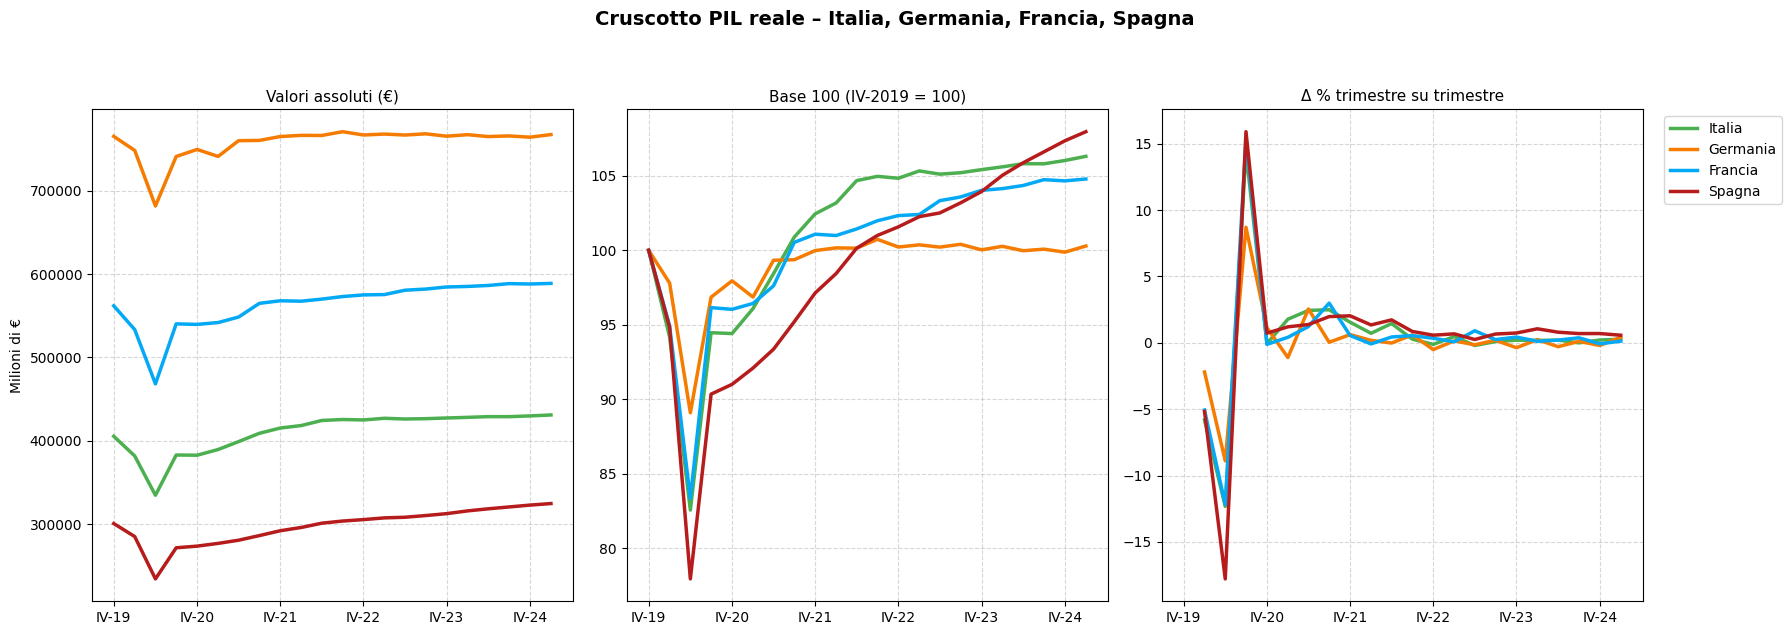

In [10]:
import matplotlib.pyplot as plt

# Definisci i colori
colori = {
    'Italia': '#4CAF50',
    'Germania': '#f57c00',
    'Francia': '#03A9F4',
    'Spagna': '#b71c1c'
}

# Prepara il canvas
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# 1. Valori assoluti
for country in colori:
    dati = df_plot[df_plot['geo_label'] == country]
    axs[0].plot(dati['time'], dati['value'], label=country, color=colori[country], linewidth=2.5)
axs[0].set_title("Valori assoluti (€)", fontsize=11)
axs[0].grid(True, linestyle='--', alpha=0.5)

# 2. Base 100
for country in colori:
    dati = df_plot[df_plot['geo_label'] == country]
    axs[1].plot(dati['time'], dati['base_100'], label=country, color=colori[country], linewidth=2.5)
axs[1].set_title("Base 100 (IV-2019 = 100)", fontsize=11)
axs[1].grid(True, linestyle='--', alpha=0.5)

# 3. Variazione %
for country in colori:
    dati = df_plot[df_plot['geo_label'] == country]
    axs[2].plot(dati['time'], dati['delta_pct'], label=country, color=colori[country], linewidth=2.5)
axs[2].set_title("Δ % trimestre su trimestre", fontsize=11)
axs[2].grid(True, linestyle='--', alpha=0.5)

# Etichette x diradate
xtick_data = df_plot[['time', 'x_label']].drop_duplicates('time').sort_values('time').iloc[::4]
for ax in axs:
    ax.set_xticks(xtick_data['time'])
    ax.set_xticklabels(xtick_data['x_label'], rotation=0)

# Titolo e legenda
fig.suptitle("Cruscotto PIL reale – Italia, Germania, Francia, Spagna", fontsize=14, weight='bold', y=1.05)
axs[0].set_ylabel("Milioni di €")
axs[2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.tight_layout()
plt.savefig("cruscotto_pil_orizzontale.png", dpi=300, bbox_inches='tight')
plt.show()


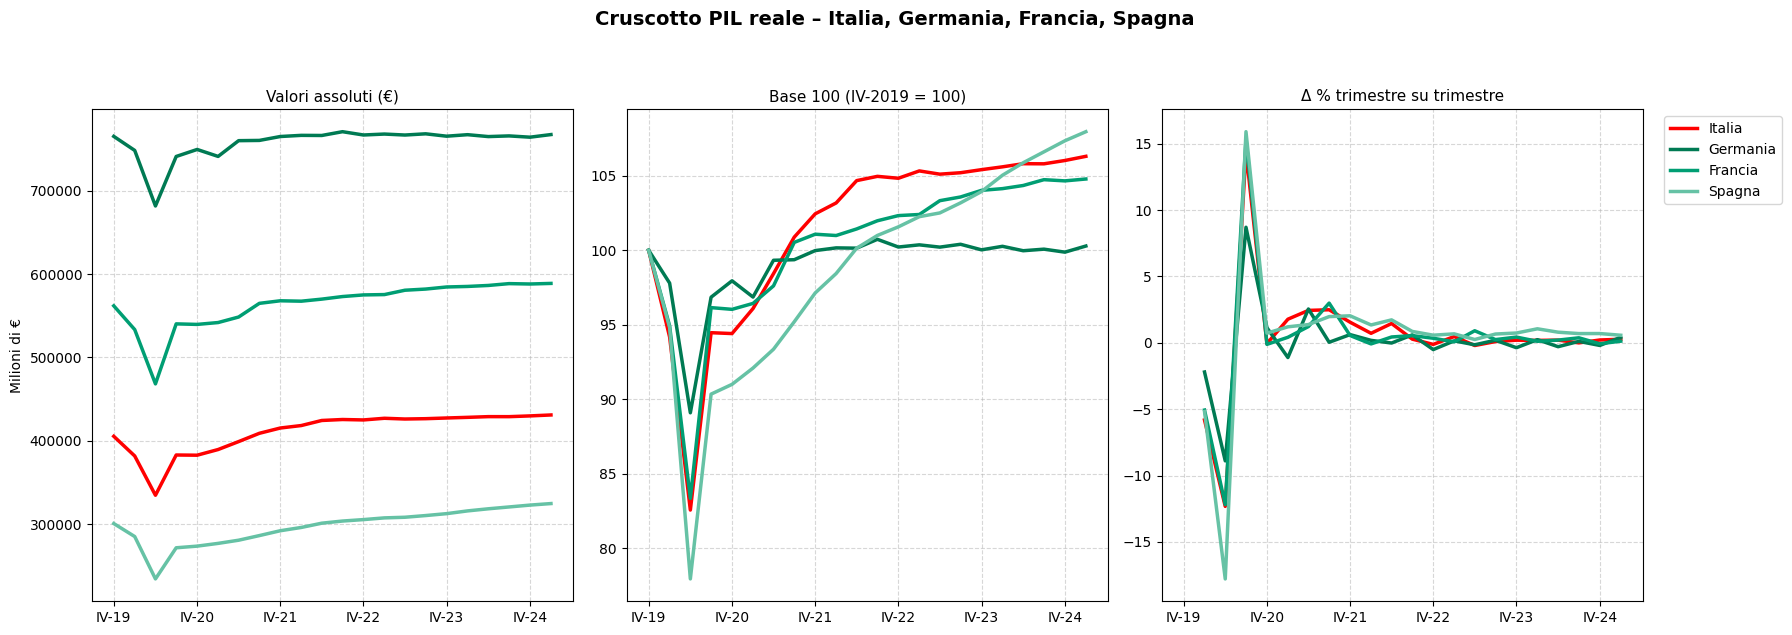

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepara il df_plot
df_plot = df[df['time_label'] >= '2019-Q4'].copy()
df_plot['geo_label'] = df_plot['geo_label'].replace({
    'Italy': 'Italia',
    'Germany': 'Germania',
    'France': 'Francia',
    'Spain': 'Spagna'
})

# Etichette trimestri
def quarter_label(dt):
    qmap = {1: 'I', 4: 'II', 7: 'III', 10: 'IV'}
    return f"{qmap.get(dt.month, '')}-{str(dt.year)[-2:]}" if dt.month in qmap else ''
df_plot['x_label'] = df_plot['time'].apply(quarter_label)

# Base 100 (IV 2019)
base_period = '2019-Q4'
df_plot['base_100'] = df_plot.groupby('geo_code')['value'].transform(
    lambda x: 100 * x / x[df_plot['time_label'] == base_period].values[0]
)

# Δ % trimestre su trimestre
df_plot.sort_values(['geo_code', 'time'], inplace=True)
df_plot['delta_pct'] = df_plot.groupby('geo_code')['value'].pct_change() * 100

# 2. Colori personalizzati
colori = {
    'Italia':   '#FF0000',  # Rosso acceso
    'Germania': '#007a53',  # Verde petrolio
    'Francia':  '#009e73',  # Verde brillante
    'Spagna':   '#66c2a5'   # Verde acqua chiaro
}

# 3. Plot
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharex=True)

# A. Valori assoluti
for paese in colori:
    dati = df_plot[df_plot['geo_label'] == paese]
    axs[0].plot(dati['time'], dati['value'], label=paese, color=colori[paese], linewidth=2.5)
axs[0].set_title("Valori assoluti (€)", fontsize=11)
axs[0].set_ylabel("Milioni di €")
axs[0].grid(True, linestyle='--', alpha=0.5)

# B. Base 100
for paese in colori:
    dati = df_plot[df_plot['geo_label'] == paese]
    axs[1].plot(dati['time'], dati['base_100'], label=paese, color=colori[paese], linewidth=2.5)
axs[1].set_title("Base 100 (IV-2019 = 100)", fontsize=11)
axs[1].grid(True, linestyle='--', alpha=0.5)

# C. Variazione %
for paese in colori:
    dati = df_plot[df_plot['geo_label'] == paese]
    axs[2].plot(dati['time'], dati['delta_pct'], label=paese, color=colori[paese], linewidth=2.5)
axs[2].set_title("Δ % trimestre su trimestre", fontsize=11)
axs[2].grid(True, linestyle='--', alpha=0.5)

# Etichette X diradate
xtick_data = df_plot[['time', 'x_label']].drop_duplicates('time').sort_values('time').iloc[::4]
for ax in axs:
    ax.set_xticks(xtick_data['time'])
    ax.set_xticklabels(xtick_data['x_label'], rotation=0)

# Layout
fig.suptitle("Cruscotto PIL reale – Italia, Germania, Francia, Spagna", fontsize=14, weight='bold', y=1.05)
axs[2].legend(loc='upper left', bbox_to_anchor=(1.03, 1))

plt.tight_layout()
plt.savefig("cruscotto_pil_colorato.png", dpi=300, bbox_inches='tight')
plt.show()


## PIL – Variazione % trimestrale (Italia)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
from itertools import product

# === PARAMETRI ===
dataset = 'namq_10_gdp'
filters = {
    'geo': ['IT'],
    'unit': 'CLV10_MEUR',
    's_adj': 'SCA',
    'na_item': ['B1GQ']
}

# === FUNZIONE PER ESTRARRE E PARSARE I DATI EUROSTAT ===
def fetch_eurostat_data(dataset, filters):
    base_url = f"https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/{dataset}"
    params = {'format': 'JSON'}
    for dim, val in filters.items():
        if isinstance(val, list):
            params[dim] = '+'.join(val)
        else:
            params[dim] = val
    response = requests.get(base_url, params=params)
    response.raise_for_status()
    data = response.json()

    # Estrai le dimensioni
    dimensions = data["dimension"]
    dim_order = data["id"]
    dim_labels = {k: dimensions[k]["category"]["label"] for k in dim_order}
    keys = [list(dim_labels[k].keys()) for k in dim_order]

    records = []
    for i, combination in enumerate(product(*keys)):
        if str(i) in data["value"]:
            record = {}
            for j, k in enumerate(dim_order):
                record[f"{k}_code"] = combination[j]
                record[f"{k}_label"] = dim_labels[k][combination[j]]
            record["value"] = data["value"][str(i)]
            records.append(record)

    df = pd.DataFrame(records)

    # Parsing data: converte '2019-Q4' in datetime
    if "time_label" in df.columns:
        df["time"] = pd.to_datetime(df["time_label"].str.replace(r"Q([1-4])", r"-\1", regex=True) + "-01", errors='coerce')

    return df

# === ESTRAZIONE DATI ===
df = fetch_eurostat_data(dataset, filters)

# === ELABORAZIONE PER L’ITALIA ===
df_ita = df[df['geo_code'] == 'IT'].copy()
df_ita = df_ita[df_ita['time_label'] >= '2020-Q4'].sort_values('time')
df_ita['delta_pct'] = df_ita['value'].pct_change() * 100
df_ita = df_ita[df_ita['delta_pct'].notna()].copy()
df_ita['label_x'] = df_ita['time_label']  # usa etichette testuali fisse tipo '2021-Q2'

In [13]:
df_ita[['na_item_code', 'na_item_label', 'geo_label','time_label', 'value', 'time', 'delta_pct']].head()

,na_item_code,na_item_label,geo_label,time_label,value,time,delta_pct
104,B1GQ,Gross domestic product at market prices,Italy,2021-Q1,389699.1,2021-01-01,1.775606
105,B1GQ,Gross domestic product at market prices,Italy,2021-Q2,399203.7,2021-02-01,2.438959
106,B1GQ,Gross domestic product at market prices,Italy,2021-Q3,409134.6,2021-03-01,2.487677
107,B1GQ,Gross domestic product at market prices,Italy,2021-Q4,415474.3,2021-04-01,1.549539
108,B1GQ,Gross domestic product at market prices,Italy,2022-Q1,418439.3,2022-01-01,0.713642


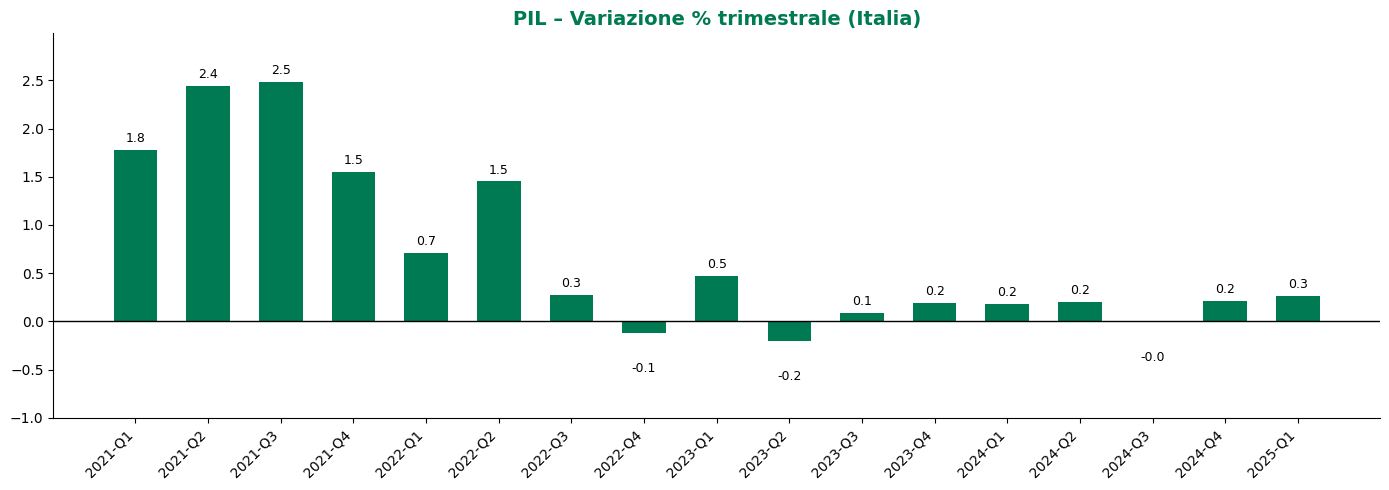

In [14]:
# === GRAFICO CON ETICHETTE TESTUALI ===
fig, ax = plt.subplots(figsize=(14, 5))
bar_color = '#007a53'

bars = ax.bar(df_ita['label_x'], df_ita['delta_pct'], width=0.6, color=bar_color)

for bar, value in zip(bars, df_ita['delta_pct']):
    if pd.notnull(value):
        ax.text(bar.get_x() + bar.get_width()/2,
                value + (0.05 if value >= 0 else -0.3),
                f"{value:.1f}",
                ha='center',
                va='bottom' if value >= 0 else 'top',
                fontsize=9, color='black')

ax.set_title("PIL – Variazione % trimestrale (Italia)", fontsize=14, weight='bold', color=bar_color)
delta_max = df_ita['delta_pct'].dropna().max()
if pd.isna(delta_max) or not pd.api.types.is_number(delta_max):
    delta_max = 3
ax.set_ylim(-1, delta_max + 0.5)
ax.axhline(0, color='black', linewidth=1)

# Asse X ordinato e leggibile
ax.set_xticks(df_ita['label_x'])
ax.set_xticklabels(df_ita['label_x'], rotation=45, ha='right')

ax.spines[['top', 'right']].set_visible(False)
ax.grid(False)

plt.tight_layout()
plt.savefig("PIL_trimestrale_Italia_spaziato.png", dpi=300)
plt.show()




## backup

In [15]:
dataset = 'namq_10_gdp'
params = {
    'geo': 'IT',                      # Italia
    's_adj': 'SCA',                   # Stagionalmente e calendarialmente aggiustato
    'unit': 'CLV10_MEUR',             # Valori concatenati, anno base 2010, milioni di euro
                                      # Prodotto interno lordo (PIL)
    'format': 'JSON'                  # Risposta in formato JSON
}

url = f"https://ec.europa.eu/eurostat/api/dissemination/statistics/1.0/data/{dataset}?geo=IT&format=JSON"
response = requests.get(url, params=params)

if response.status_code == 200:
    data = response.json()
    # print("- ✅ Connessione riuscita.")
    print("- 📦 Chiavi:", data.keys(), "\n")
    print("- 📐 Dimensioni disponibili:", data["dimension"].keys(), "\n")
    print("- 🔢 Numero di valori:", len(data["value"]), "\n")
else:
    print("❌ Errore:", response.status_code)
    print(response.text)

- 📦 Chiavi: dict_keys(['version', 'class', 'label', 'source', 'updated', 'value', 'id', 'size', 'dimension', 'extension']) 

- 📐 Dimensioni disponibili: dict_keys(['freq', 'unit', 's_adj', 'na_item', 'geo', 'time']) 

- 🔢 Numero di valori: 2453 



In [16]:
for dim, details in data["dimension"].items():
    print(f"{dim}: {len(details['category']['index'])} items")
    print("Categorie:")
    labels = details["category"]["label"]
    for code, label in sorted(labels.items()):
        print(f"  {code}: {label}")
    print()

freq: 1 items
Categorie:
  Q: Quarterly

unit: 1 items
Categorie:
  CLV10_MEUR: Chain linked volumes (2010), million euro

s_adj: 1 items
Categorie:
  SCA: Seasonally and calendar adjusted data

na_item: 39 items
Categorie:
  B11: External balance of goods and services
  B111: External balance - goods
  B112: External balance - services
  B1G: Value added, gross
  B1GQ: Gross domestic product at market prices
  B2A3G: Operating surplus and mixed income, gross
  D1: Compensation of employees
  D11: Wages and salaries
  D12: Employers' social contributions
  D2: Taxes on production and imports
  D21: Taxes on products
  D21X31: Taxes less subsidies on products
  D2X3: Taxes on production and imports less subsidies
  D3: Subsidies
  D31: Subsidies on products
  P3: Final consumption expenditure
  P31_S13: Individual consumption expenditure of general government
  P31_S14: Final consumption expenditure of households
  P31_S14_S15: Household and NPISH final consumption expenditure
  P31_S15